In [2]:
import os
directory_path = os.getcwd()
repository_path = os.path.dirname(directory_path)

import sys
sys.path.append(repository_path)
# adds a directory for this notebook to the list of locations where modules can be searched from when importing.

In [1]:
# external imports
import numpy as np
import cv2

# local imports
from dbscan.sbm_dbscan import sbm_to_binarymask, nearest_neighbor_distance, til_size, sbm_dbscan_wrapper, extract_cluster_label_counts
from tilseg.refine_kmeans import mask_to_features

### Characterizing sTILs

Convert images (stromal binary masks) to binary masks 

In [3]:
folder = '/Volumes/MRL/Clustering_for_Lisa/2005003/patch_binary_til_mask_multiplication'
binary_masks_dict = sbm_to_binarymask(folder, multiple_patches_flag=True)

Compute nearest neighbor distance for each sTIL. This will also calculate the mean, max, and standard deviation of distances for all the sTILs in each patch as well as create a histogram of distances where the frequency is the number of TILs (note: the frequency should total to the number of sTILs in the patch)

In [5]:
save_nn_path = '/Users/lisacarr/Documents/phd work/SP2024/04_09/2005003/nn_plots'
nn_distances_dict = {}
for filename, binary_mask in binary_masks_dict.items():
    mean_distance, max_distance, stdev_distance = nearest_neighbor_distance(binary_mask, save_nn_path, filename)
    nn_distances_dict[filename] = {'mean_distance': mean_distance, 'max_distance': max_distance, 'stdev_distance': stdev_distance}

Compute the area of each in sTIL in pixels. This will also calculate the mean and minimum sizes.

In [12]:
save_TILsize_path = '/Users/lisacarr/Documents/phd work/SP2024/04_09/2005003/til_size_plots'
tilsize_dict = {}
for filename, binary_mask in binary_masks_dict.items():
    mean_size, min_til_size, til_count = til_size(binary_mask)
    tilsize_dict[filename] = {'mean_size': mean_size, 'min_til_size': min_til_size, 'til_count': til_count}

Import the results from nn_distances_dict and tilsize_dict as .csv files.

In [13]:
import csv

def export_dict_to_csv_nn(filename, dct):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Image Name', 'Mean Distance', 'Max Distance', "Std Dev Distance"])
        for key, value in dct.items():
            writer.writerow([key, value['mean_distance'], value['max_distance'], value['stdev_distance']])

def export_dict_to_csv_ts(filename, dct):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Image Name', 'Mean Size', 'Minimum TIL Size', 'TIL Count'])
        for key, value in dct.items():
            writer.writerow([key, value['mean_size'], value['min_til_size'], value['til_count']])

# Export the dictionary to a CSV file
export_dict_to_csv_nn('2005003_nn.csv', nn_distances_dict)
export_dict_to_csv_ts('2005003_ts.csv', tilsize_dict)

Repeat steps for each folder of patches that you want to analyze. Be sure to provide proper save file paths in the corresponding functions if you desire to save the histograms. Otherwise, you can just input the binary mask.

In [16]:
folder1 = '/Volumes/MRL/Clustering_for_Lisa/2007005/patch_binary_til_mask_multiplication'
binary_masks_dict1 = sbm_to_binarymask(folder1, multiple_patches_flag=True)

save_nn_path1 = '/Users/lisacarr/Documents/phd work/SP2024/04_09/2007005/nn_plots'
nn_distances_dict1 = {}
for filename, binary_mask in binary_masks_dict1.items():
    mean_distance, max_distance, stdev_distance = nearest_neighbor_distance(binary_mask, save_nn_path1, filename)
    nn_distances_dict1[filename] = {'mean_distance': mean_distance, 'max_distance': max_distance, 'stdev_distance': stdev_distance}

save_TILsize_path1 = '/Users/lisacarr/Documents/phd work/SP2024/04_09/2007005/til_size_plots'
tilsize_dict1 = {}
for filename, binary_mask in binary_masks_dict1.items():
    mean_size, min_til_size, til_count = til_size(binary_mask)
    tilsize_dict1[filename] = {'mean_size': mean_size, 'min_til_size': min_til_size, 'til_count':til_count}

export_dict_to_csv_nn('2007005_nn.csv', nn_distances_dict1)
export_dict_to_csv_ts('2007005_ts.csv', tilsize_dict1)

In [14]:
folder2 = '/Volumes/MRL/Clustering_for_Lisa/2014005/patch_binary_til_mask_multiplication'
binary_masks_dict2 = sbm_to_binarymask(folder2, multiple_patches_flag=True)

save_nn_path2 = '/Users/lisacarr/Documents/phd work/SP2024/04_09/2014005/nn_plots'
nn_distances_dict2 = {}
for filename, binary_mask in binary_masks_dict2.items():
    mean_distance, max_distance, stdev_distance = nearest_neighbor_distance(binary_mask, save_nn_path2, filename)
    nn_distances_dict2[filename] = {'mean_distance': mean_distance, 'max_distance': max_distance, 'stdev_distance': stdev_distance}


save_TILsize_path2 = '/Users/lisacarr/Documents/phd work/SP2024/04_09/2014005/til_size_plots'
tilsize_dict2 = {}
for filename, binary_mask in binary_masks_dict2.items():
    mean_size, min_til_size, til_count = til_size(binary_mask)
    tilsize_dict2[filename] = {'mean_size': mean_size, 'min_til_size': min_til_size, 'til_count':til_count}

export_dict_to_csv_nn('2014005_nn.csv', nn_distances_dict2)
export_dict_to_csv_ts('2014005_ts.csv', tilsize_dict2)

In [15]:
folder3 = '/Volumes/MRL/Clustering_for_Lisa/2018014/patch_binary_til_mask_multiplication'
binary_masks_dict3 = sbm_to_binarymask(folder3, multiple_patches_flag=True)

save_nn_path3 = '/Users/lisacarr/Documents/phd work/SP2024/04_09/2018014/nn_plots'
nn_distances_dict3 = {}
for filename, binary_mask in binary_masks_dict3.items():
    mean_distance, max_distance, stdev_distance = nearest_neighbor_distance(binary_mask, save_nn_path3, filename)
    nn_distances_dict3[filename] = {'mean_distance': mean_distance, 'max_distance': max_distance, 'stdev_distance': stdev_distance}


save_TILsize_path3 = '/Users/lisacarr/Documents/phd work/SP2024/04_09/2018014/til_size_plots'
tilsize_dict3 = {}
for filename, binary_mask in binary_masks_dict3.items():
    mean_size, min_til_size, til_count = til_size(binary_mask)
    tilsize_dict3[filename] = {'mean_size': mean_size, 'min_til_size': min_til_size, 'til_count':til_count}

export_dict_to_csv_nn('2018014_nn.csv', nn_distances_dict3)
export_dict_to_csv_ts('2018014_ts.csv', tilsize_dict3)

### DBSCAN: Manual Hyperparameter Tuning

#### 2005003

In [3]:
# Defining the image paths
patch_2005003_2 = '/Volumes/MRL/Lisa_TILseg/Clustering_for_Lisa/2005003/patch_binary_til_mask_multiplication/2005003_H&E_patch_position_2.tif'
patch_2005003_23 = '/Volumes/MRL/Lisa_TILseg/Clustering_for_Lisa/2005003/patch_binary_til_mask_multiplication/2005003_H&E_patch_position_23.tif'

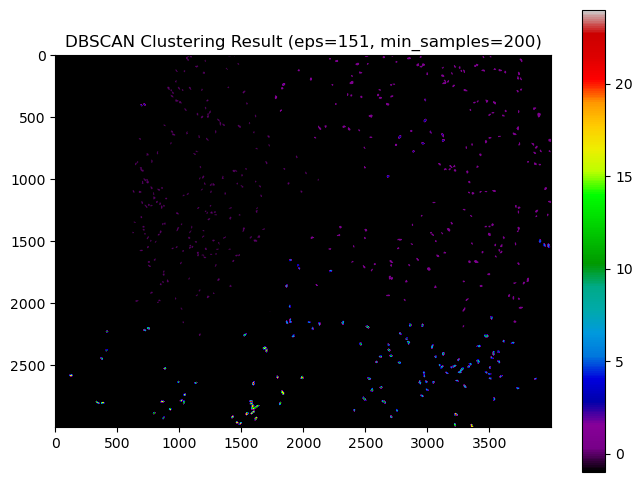

{'2005003_H&E_patch_position_2.tif': 25}


In [10]:
dbscan_hyperparam = {'eps': 151,'min_samples': 200}
dbscan_labels_2005003_2, cluster_label_counts_2005003_2 = sbm_dbscan_wrapper(patch_2005003_2,
                  out_path = '/Users/lisacarr/Documents/phd work/SP2024/04_16',  
                  hyperparameter_dict = dbscan_hyperparam, 
                  multiple_patches_flag = False,
                  save_image = True, 
                  cluster_plot = False,
                  nn_plot = False)

print(cluster_label_counts_2005003_2)

In [15]:
# Example usage:
labels_dict = dbscan_labels_2007005_31  # Your dictionary containing DBSCAN labels
    
# Iterate over each image file name and its corresponding labels
for filename, dbscan_labels in labels_dict.items():
    # Flatten the array
    flattened_labels = dbscan_labels.flatten()

    # Count the occurrences of each unique label
    unique_labels, label_counts = np.unique(flattened_labels, return_counts=True)

    # Create a dictionary to store the label counts for this image
    dbscan_labels_2005003_2[filename] = dict(zip(unique_labels, label_counts))


print(dbscan_labels_2005003_2)

{'2005003_H&E_patch_position_2.tif': {-1: 11885916, 0: 40432, 1: 43384, 2: 1307, 3: 2345, 4: 286, 5: 210, 6: 1060, 7: 455, 8: 259, 9: 1735, 10: 8985, 11: 280, 12: 4373, 13: 547, 14: 382, 15: 431, 16: 240, 17: 582, 18: 1716, 19: 211, 20: 694, 21: 250, 22: 2866, 23: 391, 24: 663}, '2007005_H&E_patch_position_31.tif': {-1: 11842697, 0: 18371, 1: 344, 2: 436, 3: 643, 4: 206, 5: 236, 6: 82474, 7: 14227, 8: 1000, 9: 289, 10: 25109, 11: 394, 12: 256, 13: 227, 14: 242, 15: 501, 16: 284, 17: 1414, 18: 249, 19: 1109, 20: 666, 21: 234, 22: 233, 23: 7083, 24: 1076}}


In [16]:
# Extract cluster label counts from DBSCAN clustering image (.tif file) created from sbm_dbscan_wrapper function
tiff_path = "/Users/lisacarr/Documents/phd work/SP2024/04_16/2007005_H&E_patch_position_31_dbscan_clustering.tif"
cluster_label_counts = extract_cluster_label_counts(tiff_path)
print(cluster_label_counts)

{0: 18371, 1: 344, 2: 436, 3: 643, 4: 206, 5: 236, 6: 82474, 7: 14227, 8: 1000, 9: 289, 10: 25109, 11: 394, 12: 256, 13: 227, 14: 242, 15: 501, 16: 284, 17: 1414, 18: 249, 19: 1109, 20: 666, 21: 234, 22: 233, 23: 7083, 24: 1076, 255: 619}


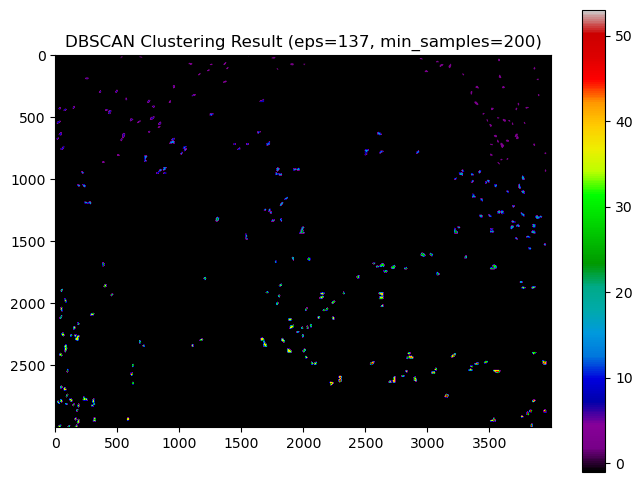

{'2005003_H&E_patch_position_23.tif': 54}


In [94]:
dbscan_hyperparam = {'eps': 137,'min_samples': 200}
dbscan_labels_2005003_23, cluster_label_counts_2005003_23 = sbm_dbscan_wrapper(patch_2005003_23,
                  out_path = '/Users/lisacarr/Documents/phd work/SP2024/04_16',  
                  hyperparameter_dict = dbscan_hyperparam, 
                  multiple_patches_flag = False,
                  save_image = False, 
                  cluster_plot = False,
                  nn_plot = False)

print(cluster_label_counts_2005003_23)

#### 2007005

In [11]:
# Defining the image paths
patch_2007005_31 = '/Volumes/MRL/Lisa_TILseg/Clustering_for_Lisa/2007005/patch_binary_til_mask_multiplication/2007005_H&E_patch_position_31.tif'
patch_2007005_39 = '/Volumes/MRL/Lisa_TILseg/Clustering_for_Lisa/2007005/patch_binary_til_mask_multiplication/2007005_H&E_patch_position_39.tif'

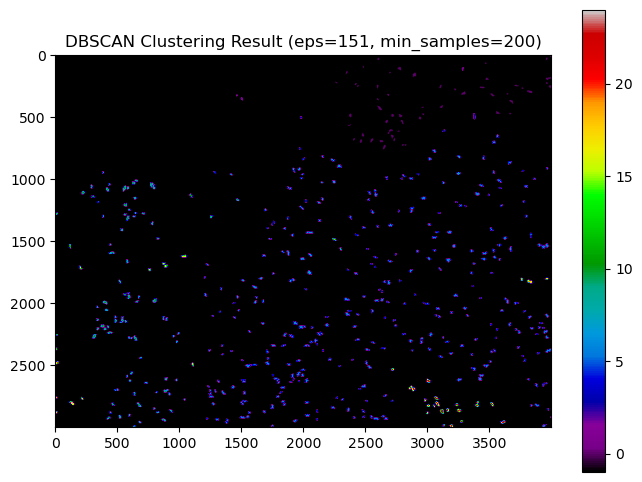

{'2007005_H&E_patch_position_31.tif': 25}


In [12]:
dbscan_hyperparam = {'eps': 151,'min_samples': 200}
dbscan_labels_2007005_31, cluster_label_counts_2007005_31 = sbm_dbscan_wrapper(patch_2007005_31,
                  out_path = '/Users/lisacarr/Documents/phd work/SP2024/04_16/DBSCAN Results/2007005',  
                  hyperparameter_dict = dbscan_hyperparam, 
                  multiple_patches_flag = False,
                  save_image = True, 
                  cluster_plot = False,
                  nn_plot = False)

print(cluster_label_counts_2007005_31)

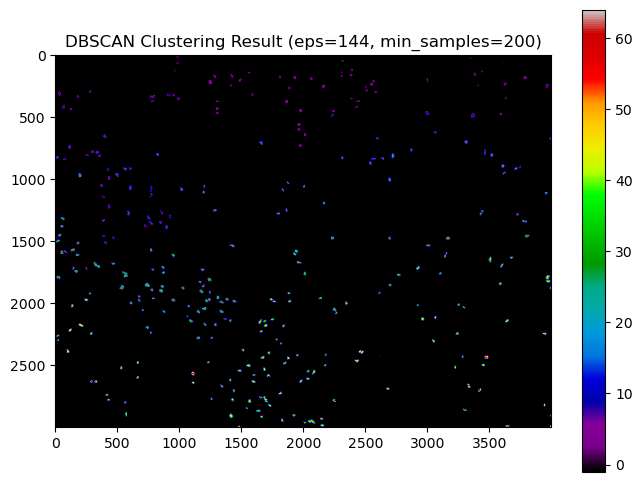

{'2007005_H&E_patch_position_39.tif': 65}


In [96]:
dbscan_hyperparam = {'eps': 144,'min_samples': 200}
dbscan_labels_2007005_39, cluster_label_counts_2007005_39 = sbm_dbscan_wrapper(patch_2007005_39,
                  out_path = '/Users/lisacarr/Documents/phd work/SP2024/04_16',  
                  hyperparameter_dict = dbscan_hyperparam, 
                  multiple_patches_flag = False,
                  save_image = False, 
                  cluster_plot = False,
                  nn_plot = False)

print(cluster_label_counts_2007005_39)

#### 2018014

In [88]:
# Defining the image paths
patch_2018014_10 = '/Volumes/MRL/Lisa_TILseg/Clustering_for_Lisa/2018014/patch_binary_til_mask_multiplication/2018014_H&E_patch_position_10.tif'
patch_2018014_39 = '/Volumes/MRL/Lisa_TILseg/Clustering_for_Lisa/2018014/patch_binary_til_mask_multiplication/2018014_H&E_patch_position_39.tif'

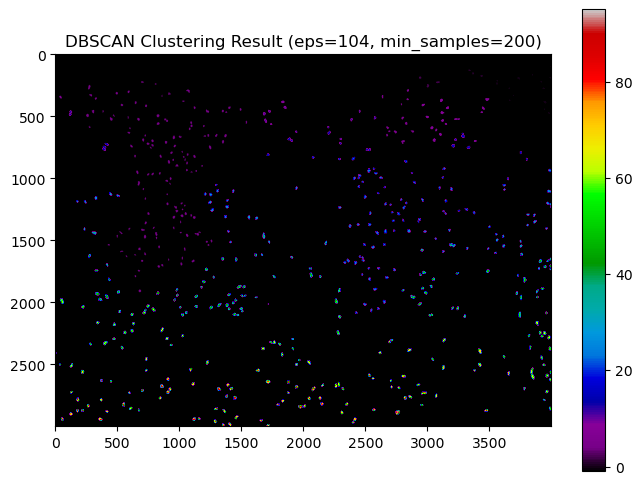

{'2018014_H&E_patch_position_10.tif': 96}


In [97]:
dbscan_hyperparam = {'eps': 104,'min_samples': 200}
dbscan_labels_2018014_10, cluster_label_counts_2018014_10 = sbm_dbscan_wrapper(patch_2018014_10,
                  out_path = '/Users/lisacarr/Documents/phd work/SP2024/04_16',  
                  hyperparameter_dict = dbscan_hyperparam, 
                  multiple_patches_flag = False,
                  save_image = False, 
                  cluster_plot = False,
                  nn_plot = False)

print(cluster_label_counts_2018014_10)

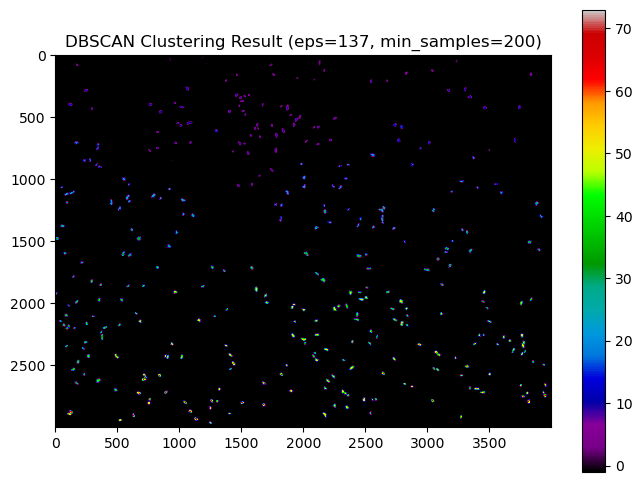

{'2018014_H&E_patch_position_39.tif': 74}


In [98]:
dbscan_hyperparam = {'eps': 137,'min_samples': 200}
dbscan_labels_2018014_39, cluster_label_counts_2018014_39 = sbm_dbscan_wrapper(patch_2018014_39,
                  out_path = '/Users/lisacarr/Documents/phd work/SP2024/04_16',  
                  hyperparameter_dict = dbscan_hyperparam, 
                  multiple_patches_flag = False,
                  save_image = False, 
                  cluster_plot = False,
                  nn_plot = False)

print(cluster_label_counts_2018014_39)

#### 2014005
Note: I couldn't find the original patches for this patient

In [ ]:
dbscan_hyperparam = {'eps': 191,'min_samples': 200}
dbscan_labels2, cluster_label_counts2 = sbm_dbscan_wrapper(patch_2014005_10,
                  out_path = '//Users/lisacarr/Documents/phd work/SP2024/04_16',  
                  hyperparameter_dict = dbscan_hyperparam, 
                  multiple_patches_flag = False,
                  save_image = False, 
                  cluster_plot = False,
                  nn_plot = False)

print(cluster_label_counts2)

### DBSCAN: RandomSearchCV (Work in Progress)

In [109]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, make_scorer

In [108]:
patch_2005003_2_mask = sbm_to_binarymask(patch_2005003_2)
patch_2005003_2_features = mask_to_features(patch_2005003_2_mask, binary_flag=True)

In [110]:
# Define the parameter grid
param_grid = {
    'eps': [65, 100, 120, 140, 160],  
    'min_samples': [100, 150, 200, 250],    
}

# Create a DBSCAN instance
dbscan = DBSCAN()

# Define the silhouette scorer
silhouette_scorer = make_scorer(silhouette_score)

# Create RandomizedSearchCV instance
random_search = RandomizedSearchCV(estimator=dbscan, param_distributions=param_grid, n_iter=20, scoring=silhouette_scorer, cv=5, random_state=42)

# Perform random search
random_search.fit(patch_2005003_2_features)  # X is your data

# Get the best hyperparameters
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best silhouette score:", best_score)
print("Best parameters:", best_params)

/Users/lisacarr/opt/anaconda3/envs/tilseg_mac2/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/lisacarr/opt/anaconda3/envs/tilseg_mac2/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Users/lisacarr/opt/anaconda3/envs/tilseg_mac2/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/lisacarr/opt/anaconda3/envs/tilseg_mac2/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", lin

Best silhouette score: nan
Best parameters: {'min_samples': 100, 'eps': 65}


### Binning DBSCAN Labels (Work in Progress)

In [47]:
binary_mask = sbm_to_binarymask(patch_2005003_0, multiple_patches_flag=False)

In [51]:
dbscan_labels_actual = dbscan_labels['2005003_H&E_patch_position_0.tif']

In [ ]:
import numpy as np
import cv2

def combine_labels(binary_mask, dbscan_labels_dict):
    combined_labels_dict = {}  # Initialize combined labels dictionary

    # Iterate over each filename and corresponding DBSCAN labels
    for filename, dbscan_labels in dbscan_labels_dict.items():
        # Label connected components in the binary mask
        num_regions, labeled_mask = cv2.connectedComponents(binary_mask.astype(np.uint8))

        combined_labels = np.zeros_like(binary_mask)  # Initialize combined labels array

        # Iterate over each unique TIL region
        for label in range(1, num_regions):  # Start from 1 as 0 is background
            # Extract the pixels within the current TIL region
            til_region = np.where(labeled_mask == label)
            
            # Convert coordinates to indices
            indices = np.array(list(zip(til_region[0], til_region[1])))

            # Extract the DBSCAN labels corresponding to the current TIL region
            til_dbscan_labels = dbscan_labels[indices[:, 0], indices[:, 1]]

            # Filter out negative elements (background) from til_dbscan_labels
            til_dbscan_labels = [label for label in til_dbscan_labels if label >= 0]

            if til_dbscan_labels:  # Check if there are any valid labels in the region
                # Count occurrences of each cluster label within the TIL region
                label_counts = np.bincount(til_dbscan_labels)

                # Determine the majority cluster label
                majority_label = np.argmax(label_counts)

                # Assign the majority cluster label to all pixels within the TIL region
                combined_labels[til_region] = majority_label
            else:
                print(f"No valid DBSCAN labels found for region in {filename}")

        combined_labels_dict[filename] = combined_labels  # Store combined labels in the dictionary

    return combined_labels_dict

# Example binary mask of TILs
binary_mask = np.array([[0, 1, 0, 0],
                        [1, 1, 1, 0],
                        [0, 0, 0, 0]])

# Example dictionary of DBSCAN labels
dbscan_labels_dict = {'2005003_H&E_patch_position_0.tif': np.array([[0, 0, 0, -1],
                                                                    [0, 1, 1, -1],
                                                                    [-1, -1, -1, -1]])}

# Combine the binary mask and DBSCAN labels
combined_labels_dict = combine_labels(binary_mask, dbscan_labels_dict)

print("Combined Labels:")
print(combined_labels_dict)